In [ ]:
import eli5
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_log_error

In [ ]:
train = pd.read_table('/content/drive/MyDrive/Private/Kaggle Practice/Dataset/train.tsv')
train.head()

In [ ]:
train.info()

In [ ]:
y_train = train['price']
y_train = np.log1p(y_train)

In [ ]:
train['category_name'] = train['category_name'].fillna('other').astype(str)

In [ ]:
train['brand_name'] = train['brand_name'].fillna('missing').astype(str)
train['shipping'] = train['shipping'].astype(str)
train['item_condition_id'] = train['item_condition_id'].astype(str)
train['item_description'] = train['item_description'].fillna('None')

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [ ]:
pip install nltk

In [ ]:
text = """The voice that navigated was definitely that of a machine, and yet you could tell that the machine was a woman, which hurt my mind a little. How can machines have genders? The machine also had an American accent. How can machines have nationalities? This can't be a good idea, making machines talk like real people, can it? Giving machines humanoid identities?"""

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)
print(tokenized_word)

['The', 'voice', 'that', 'navigated', 'was', 'definitely', 'that', 'of', 'a', 'machine', ',', 'and', 'yet', 'you', 'could', 'tell', 'that', 'the', 'machine', 'was', 'a', 'woman', ',', 'which', 'hurt', 'my', 'mind', 'a', 'little', '.', 'How', 'can', 'machines', 'have', 'genders', '?', 'The', 'machine', 'also', 'had', 'an', 'American', 'accent', '.', 'How', 'can', 'machines', 'have', 'nationalities', '?', 'This', 'ca', "n't", 'be', 'a', 'good', 'idea', ',', 'making', 'machines', 'talk', 'like', 'real', 'people', ',', 'can', 'it', '?', 'Giving', 'machines', 'humanoid', 'identities', '?']


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.probability import FreqDist
freq_dist_word = FreqDist(tokenized_word)
print(freq_dist_word.most_common(5))

[('a', 4), (',', 4), ('machines', 4), ('?', 4), ('that', 3)]


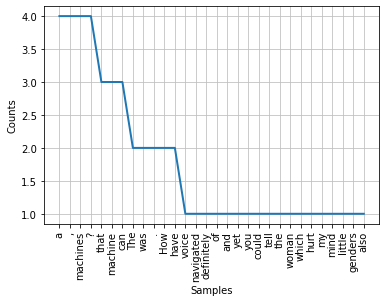

In [ ]:

import matplotlib.pyplot as plt
freq_dist_word.plot(30,cumulative=False)
plt.show()

In [ ]:
#Filtering Stop List
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword_list = set(stopwords.words("english"))
print(stopword_list)

{'having', "won't", 'it', 'out', 'ain', "wouldn't", 'are', 'further', 'here', 'each', 'i', 'not', 'to', 'they', 'themselves', "she's", 'mightn', 'yourself', 'be', 'any', 'herself', 'these', 't', "shouldn't", 'needn', 's', 'our', 'were', 'from', 'all', "didn't", 'over', "hasn't", 'before', "doesn't", 'am', "it's", 'this', 'doesn', 'ma', 'hadn', 'don', 'ourselves', 'had', 'for', 'most', 'too', 'above', 'and', 'whom', 'why', 'into', 'there', 'isn', 'because', "mustn't", 'hers', 'should', 'theirs', 'those', 'during', 'how', 'won', 'on', 'shouldn', 'than', "isn't", 'mustn', "shan't", 'has', 'was', 'have', 'm', 'myself', 'other', 'no', 'nor', 'up', "needn't", 'himself', 'just', 'about', 'down', 'below', 'very', 'been', "haven't", 'again', 'until', 'haven', 'where', 'd', "you're", 'with', 've', 'yourselves', 'what', 'her', "mightn't", 'shan', 'couldn', "aren't", 'the', 'my', 'its', 'wasn', 'itself', 'then', 'few', 'their', 'when', 'more', 'y', 'own', 'that', 'of', 'being', 'ours', "that'll", 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing Stop words from a text
from nltk.tokenize import word_tokenize
text = 'Learn to lose your destiny to find where it leads you'
word_tokenized = word_tokenize(text)
filtered_text = []
for word in word_tokenized:
  if word not in stopword_list:
    filtered_text.append(word)

print(filtered_text)

['Learn', 'lose', 'destiny', 'find', 'leads']


In [ ]:
print('Tokenized list without stopwords:{}'.format(word_tokenized))
print('Tokenized list with stopwords:{}'.format(filtered_text))

Tokenized list without stopwords:['Learn', 'to', 'lose', 'your', 'destiny', 'to', 'find', 'where', 'it', 'leads', 'you']
Tokenized list with stopwords:['Learn', 'lose', 'destiny', 'find', 'leads']


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for word in filtered_text:
    print(word, " : ", ps.stem(word))

Learn  :  learn
lose  :  lose
destiny  :  destini
find  :  find
leads  :  lead


In [ ]:
sample = ['happy', 'happier', 'happiest', 'fairly']
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for word in sample:
  print(word + '---->' + ps.stem(word))

happy---->happi
happier---->happier
happiest---->happiest
fairly---->fairli


In [ ]:
from nltk.stem.snowball import SnowballStemmer
snow_stem = SnowballStemmer(language = 'english')
for word in sample:
  print(word + '--->' + snow_stem.stem(word))

happy--->happi
happier--->happier
happiest--->happiest
fairly--->fair


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for word in sample:
  print(word + '--->' + lemmatizer.lemmatize(word))

happy--->happy
happier--->happier
happiest--->happiest
fairly--->fairly


In [ ]:
import nltk
nltk.download('all')

In [ ]:
text = " I'm going to meet MSr. Zahra"
from nltk import pos_tag
from nltk.tokenize import word_tokenize
word_tokenized = word_tokenize(text)
Part_of_Speech = pos_tag(word_tokenized, tagset='universal')
print(Part_of_Speech)

[('I', 'PRON'), ("'m", 'VERB'), ('going', 'VERB'), ('to', 'PRT'), ('meet', 'VERB'), ('MSr', 'NOUN'), ('.', '.'), ('Zahra', 'NOUN')]
